<a href="https://colab.research.google.com/github/rovilay/Airbnb-superhost-classification/blob/develop/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem

## Superhost Classification

Airbnb has a "Superhost" program for highly rated and reliable hosts. In this project, we will create a classification model to predict whether a host is a Superhost based on features like number of listings, response rate, number of reviews, etc.

### [Who is an Airbnb superhost?](https://www.airbnb.com/d/superhost-guest#:~:text=Being%20an%20Airbnb%20Superhost%20is,and%20often%20exceeding%2C%20guest%20expectations.)

Airbnb Superhosts are the top-rated, most experienced hosts on Airbnb, committed to providing you with outstanding hospitality.

### What makes a Superhost super?

Every 3 months, each host is evaluated on their hospitality. Superhosts meet all of the criteria—they’re highly rated, experienced, reliable, and responsive.

*The relevant criteria include:*

1. ***4.8+ overall rating:*** Every Superhost has a track record of highly rated stays, which means you can expect outstanding hospitality.
2. ***10+ stays:*** Superhosts are experienced, with a strong track record of hosting Airbnb guests.
3. **<1% cancellation rate:** Enjoy peace of mind as you plan—Superhosts rarely cancel.
4. ***90% response rate:*** Get a quick response when you reach out. Help and answers from a Superhost are just a message away.





## Import Libraries


In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_squared_error, confusion_matrix

## About the Dataset

This dataset includes in-depth information about Airbnb listings in terms of host, location, and reviews. It has all the necessary details one may need to know before embarking on an Airbnb stay experience. It provides descriptions, summaries, and pictures of the properties; data about hosts such as their profile picture, contact information, response time and so forth; as well as ratings related to cleanliness, accuracy and more. The dataset even captures transit options near a listing's location! Spend your next getaway with peace of mind knowing that you have all the data at hand to help make your stay a pleasant one.

[LEARN MORE](https://www.kaggle.com/datasets/thedevastator/airbnb-listings-analysis-host-location-and-revie/data)

## Load Dataset

Vist [here](https://www.kaggle.com/discussions/general/74235) to learn how to download data from Kaggle to google colab

In [ ]:
 ! pip install -q kaggle

In [ ]:
# upload kaggle credentials
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! mkdir ~/.kaggle

In [ ]:
# copy kaggle.json to .kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
# change permissions of the file
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# check if everything works well
! kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           7749        187  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          13880        253  1.0              
willianoliveiragibin/qs-top-100-universities                       QS top 100 universities                              4KB  2024-01-21 20:40:02            935         24  1.0              
asaniczka/video-game-sales-2024                   

In [ ]:
# download dataset
! kaggle datasets download -d thedevastator/airbnb-listings-analysis-host-location-and-revie

  0% 0.00/3.58M [00:00<?, ?B/s]
100% 3.58M/3.58M [00:00<00:00, 173MB/s]


In [ ]:
! mkdir abnb_data

In [ ]:
# unzip train data there,
! unzip airbnb-listings-analysis-host-location-and-revie.zip -d abnb_data

Archive:  airbnb-listings-analysis-host-location-and-revie.zip
  inflating: abnb_data/listings.csv  


In [ ]:
# Load the dataset
data_file = 'abnb_data/listings.csv'
data = pd.read_csv(data_file)

# 2. Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data


## Data Cleaning

The data cleaning procedures include:

* Deleting redundant columns
* Dropping duplicates
* Cleaning individual columns
* Remove the NaN values from the dataset
* Some Transformations

In [ ]:
df = data.copy()

**Print shape of dataset**

In [ ]:
df.shape

(3818, 93)

**Print datatypes of dataset**


In [ ]:
df.dtypes

index                                 int64
id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 93, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 93 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             3818 non-null   int64  
 1   id                                3818 non-null   int64  
 2   listing_url                       3818 non-null   object 
 3   scrape_id                         3818 non-null   int64  
 4   last_scraped                      3818 non-null   object 
 5   name                              3818 non-null   object 
 6   summary                           3641 non-null   object 
 7   space                             3249 non-null   object 
 8   description                       3818 non-null   object 
 9   experiences_offered               3818 non-null   object 
 10  neighborhood_overview             2786 non-null   object 
 11  notes                             2212 non-null   object 
 12  transi

**Drop duplicates (if any)**

In [ ]:
df[df.duplicated()].sum()

index                               0.0
id                                  0.0
listing_url                         0.0
scrape_id                           0.0
last_scraped                        0.0
                                   ... 
cancellation_policy                 0.0
require_guest_profile_picture       0.0
require_guest_phone_verification    0.0
calculated_host_listings_count      0.0
reviews_per_month                   0.0
Length: 93, dtype: float64

In [ ]:
df.drop_duplicates(inplace=True)

**Drop unneccessary features**

These are features that do not provide relevant information to the problem.

In [ ]:
dropped_features = ['description', 'jurisdiction_names', 'security_deposit', 'reviews_per_month',
 'state', 'cleaning_fee', 'medium_url', 'street', 'name', 'experiences_offered',
 'host_since', 'market', 'city', 'weekly_price', 'transit', 'notes', 'country_code',
 'id', 'host_picture_url', 'license', 'index', 'require_guest_phone_verification',
 'xl_picture_url', 'scrape_id', 'host_about', 'country', 'last_scraped',
 'thumbnail_url', 'is_location_exact', 'host_thumbnail_url', 'monthly_price',
 'host_id', 'space', 'first_review', 'calendar_updated', 'cancellation_policy',
 'last_review', 'require_guest_profile_picture', 'picture_url', 'calendar_last_scraped',
 'host_url', 'requires_license', 'smart_location', 'host_name',
 'neighborhood_overview', 'zipcode', 'host_location','summary', 'listing_url'
]

In [ ]:
df.drop(dropped_features, axis=1, inplace=True)

**Check null values**

In [ ]:
# Display columns with null values and their respective counts
null_columns = df.columns[df.isnull().any()]
null_counts = df[null_columns].isnull().sum()

# Create a DataFrame to display the results
null_info = pd.DataFrame({
    'Count': null_counts
})

null_info

,Count
host_response_time,523
host_response_rate,523
host_acceptance_rate,773
host_is_superhost,2
host_neighbourhood,300
host_listings_count,2
host_total_listings_count,2
host_has_profile_pic,2
host_identity_verified,2
neighbourhood,416


**Drop columns with more than 50% Null**

In [ ]:
threshold = len(df) * 0.5

# Drop columns with more than 50% NaN values
df.dropna(axis=1, thresh=threshold, inplace=True)

**Data so far ...**

In [ ]:
df.head(5)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count
0,within a few hours,96%,100%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,2
1,within an hour,98%,100%,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,6
2,within a few hours,67%,100%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2
3,NaN,NaN,NaN,f,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1
4,within an hour,100%,NaN,f,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_time              3295 non-null   object 
 1   host_response_rate              3295 non-null   object 
 2   host_acceptance_rate            3045 non-null   object 
 3   host_is_superhost               3816 non-null   object 
 4   host_neighbourhood              3518 non-null   object 
 5   host_listings_count             3816 non-null   float64
 6   host_total_listings_count       3816 non-null   float64
 7   host_verifications              3818 non-null   object 
 8   host_has_profile_pic            3816 non-null   object 
 9   host_identity_verified          3816 non-null   object 
 10  neighbourhood                   3402 non-null   object 
 11  neighbourhood_cleansed          3818 non-null   object 
 12  neighbourhood_group_cleansed    38

**Group features based on superhost classification criteria**

1. ***4.8+ overall rating***
2. ***10+ stays***
3. **<1% cancellation rate**
4. ***90% response rate***

In [ ]:
# Intuitively group features that are closely related to the superhost criteria
dependent_feat = ['host_is_superhost']
ratings_feats = ['calculated_host_listings_count', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']
stays_feats = ['host_neighbourhood', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights']
cancellation_rate_feats = ['host_neighbourhood', 'host_identity_verified', 'host_has_profile_pic']
response_rate_feats = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'host_verifications']
other_feats = ['latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'instant_bookable', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed']

# selected_feats = np.concatenate((dependent_feat, ratings_feats, stays_feats,
#                                  cancellation_rate_feats, response_rate_feats, other_feats))

# # drop duplicates
# selected_feats = list(set(selected_feats))
# print(selected_feats)

#### EDA: Data Transformations, Analysis and Visualization

```
# This is formatted as code
```



**Show columns with object datatypes**

Some of these columns require some transformation to extract necessary data

In [ ]:
object_dtypes_df = df.select_dtypes(include=['object'])

object_dtypes_df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bed_type,amenities,price,extra_people,has_availability,instant_bookable
0,within a few hours,96%,100%,f,Queen Anne,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,$5.00,t,f
1,within an hour,98%,100%,t,Queen Anne,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,$0.00,t,f
2,within a few hours,67%,100%,f,Queen Anne,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,Queen Anne,West Queen Anne,Queen Anne,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,$25.00,t,f
3,NaN,NaN,NaN,f,Queen Anne,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,$0.00,t,f
4,within an hour,100%,NaN,f,Queen Anne,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Queen Anne,West Queen Anne,Queen Anne,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,$15.00,t,f


**Convert currency columns to numeric values**



In [ ]:
currency_columns = ['price', 'extra_people']

for col in currency_columns:
    df[col] = df[col].str[1:].str.replace(",","").astype("float")

In [ ]:
df[currency_columns].head()

,price,extra_people
0,85.0,5.0
1,150.0,0.0
2,975.0,25.0
3,100.0,0.0
4,450.0,15.0


**Convert boolean columns to numeric values**

In [ ]:
bool_columns = ['host_is_superhost', 'has_availability', 'host_identity_verified',
                'host_has_profile_pic', 'instant_bookable']
df[bool_columns].head()

,host_is_superhost,has_availability,host_identity_verified,host_has_profile_pic,instant_bookable
0,f,t,t,t,f
1,t,t,t,t,f
2,f,t,t,t,f
3,f,t,t,t,f
4,f,t,t,t,f


In [ ]:
# convert bool columns to int dtype
for col in bool_columns:
  df[col] = df[col].apply(lambda x: 1 if x == 't' else 0)

df[bool_columns].head()

,host_is_superhost,has_availability,host_identity_verified,host_has_profile_pic,instant_bookable
0,0,1,1,1,0
1,1,1,1,1,0
2,0,1,1,1,0
3,0,1,1,1,0
4,0,1,1,1,0


**Extract numeric value from percentage columns**

In [ ]:
percent_columns = ['host_response_rate', 'host_acceptance_rate']

for col in percent_columns:
  df[col] = df[col].str[:-1].astype("float") / 100

**Fill NaN**

In [ ]:
columns_with_nan = df.columns[df.isna().any()].tolist()
columns_with_nan

['host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'neighbourhood',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [ ]:
# for host_is_superhost
df['host_is_superhost'].fillna(0, inplace=True)

# for host_listings_count fill 0
df['host_listings_count'].fillna(0, inplace=True)

# for host_total_listings_count fill 0
df['host_total_listings_count'].fillna(0, inplace=True)

# for property related feats fill with property average
property_feats_with_nan = ['bathrooms', 'beds', 'bedrooms']

for col in property_feats_with_nan:
  if col not in columns_with_nan:
    print(f'{col} do not exist in data')
    continue

  avg = df.groupby('property_type')[col].mean()
  # Fill NaN values in host_response_rate based on the average of each property group
  df[col] = df.apply(
      lambda row: avg[row['property_type']] if pd.isna(row[col]) else row[col],
      axis=1
  )

other_feats_with_nan = ['review_scores_accuracy', 'review_scores_cleanliness',
                        'review_scores_communication', 'review_scores_location',
                        'host_acceptance_rate', 'review_scores_value',
                        'review_scores_checkin', 'review_scores_rating', 'host_response_rate']
for col in other_feats_with_nan:
  if col not in columns_with_nan:
    print(f'{col} do not exist in data')
    continue

  # Calculate the average response rate for each host_is_superhost group
  avg = df.groupby('host_is_superhost')[col].mean()

  # Fill NaN values in host_response_rate based on the average of each group
  df[col] = df.apply(
      lambda row: avg[row['host_is_superhost']] if pd.isna(row[col]) else row[col],
      axis=1
  )

df[columns_with_nan].isna().sum()

host_response_time             523
host_response_rate               0
host_acceptance_rate             0
host_neighbourhood             300
host_listings_count              0
host_total_listings_count        0
neighbourhood                  416
property_type                    1
bathrooms                        0
bedrooms                         0
beds                             0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value              0
dtype: int64

**Superhost distribution**

Total number of Superhosts:  778


Int64Index([0, 1], dtype='int64')


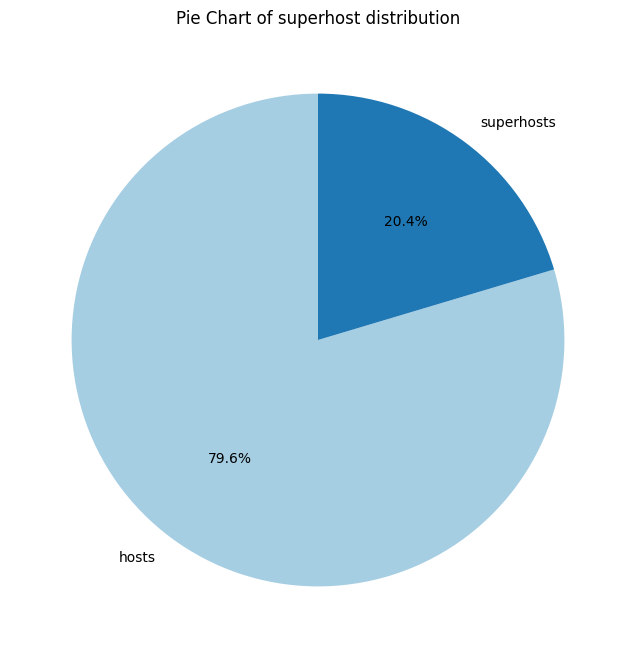

In [ ]:
column_name = 'host_is_superhost'

superhost_count = df[column_name].sum()

print("Total number of Superhosts: ", superhost_count)
print('\n')

# Count the occurrences of each unique value in the chosen column
value_counts = df[column_name].value_counts()

print(value_counts.index)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=['hosts', 'superhosts'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title(f'Pie Chart of superhost distribution')
plt.show()

**Host response time vs Host response rate**

Group average host_response_rate by host_response_time

['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']


<ipython-input-35-4b89f448a936>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=res.index, y='avg_host_response_rate', data=res, palette='viridis')


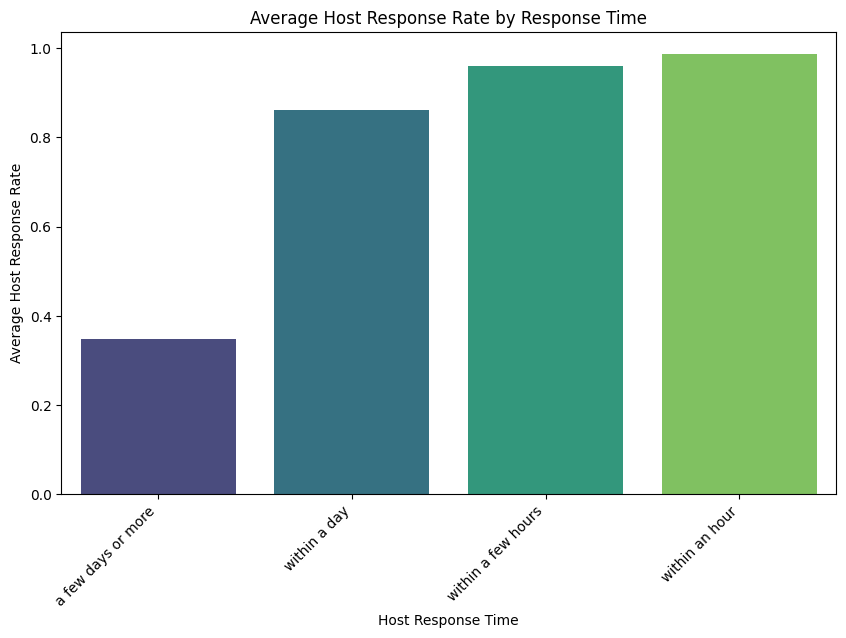

In [ ]:
print(df['host_response_time'].unique())
res = df.groupby('host_response_time').agg(
    avg_host_response_rate=('host_response_rate', 'mean')
)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=res.index, y='avg_host_response_rate', data=res, palette='viridis')
plt.title('Average Host Response Rate by Response Time')
plt.xlabel('Host Response Time')
plt.ylabel('Average Host Response Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

**Convert host_response_time to numeric value**

Map `host_response_time` to numeric values, creat a new column; `host_response_time_numeric` and drop the `host_response_time` column

In [ ]:
# Define a mapping dictionary
response_time_mapping = {
    'within an hour': 4,
    'within a few hours': 3,
    'within a day': 2,
    'a few days or more': 1
}

# Use the map function to convert categorical values to numerical values
df['host_response_time_numeric'] = df['host_response_time'].map(response_time_mapping).fillna(0).astype(int)

# drop the host_response_time
df.drop(['host_response_time'], axis=1, inplace=True)

**Count number of superhosts by neighbourhood group**

In [ ]:
# Neighbor hood
superhost_counts = df.groupby('neighbourhood_group_cleansed')['host_is_superhost'].sum().sort_values(ascending=False)

# Display the resulting Series with counts
print(superhost_counts)

neighbourhood_group_cleansed
Other neighborhoods    165
Downtown               105
Central Area           100
Capitol Hill            85
Ballard                 61
Queen Anne              61
West Seattle            44
Rainier Valley          38
Northgate               21
Delridge                19
Beacon Hill             18
Cascade                 16
Magnolia                14
Lake City               12
Seward Park             10
University District      7
Interbay                 2
Name: host_is_superhost, dtype: int64


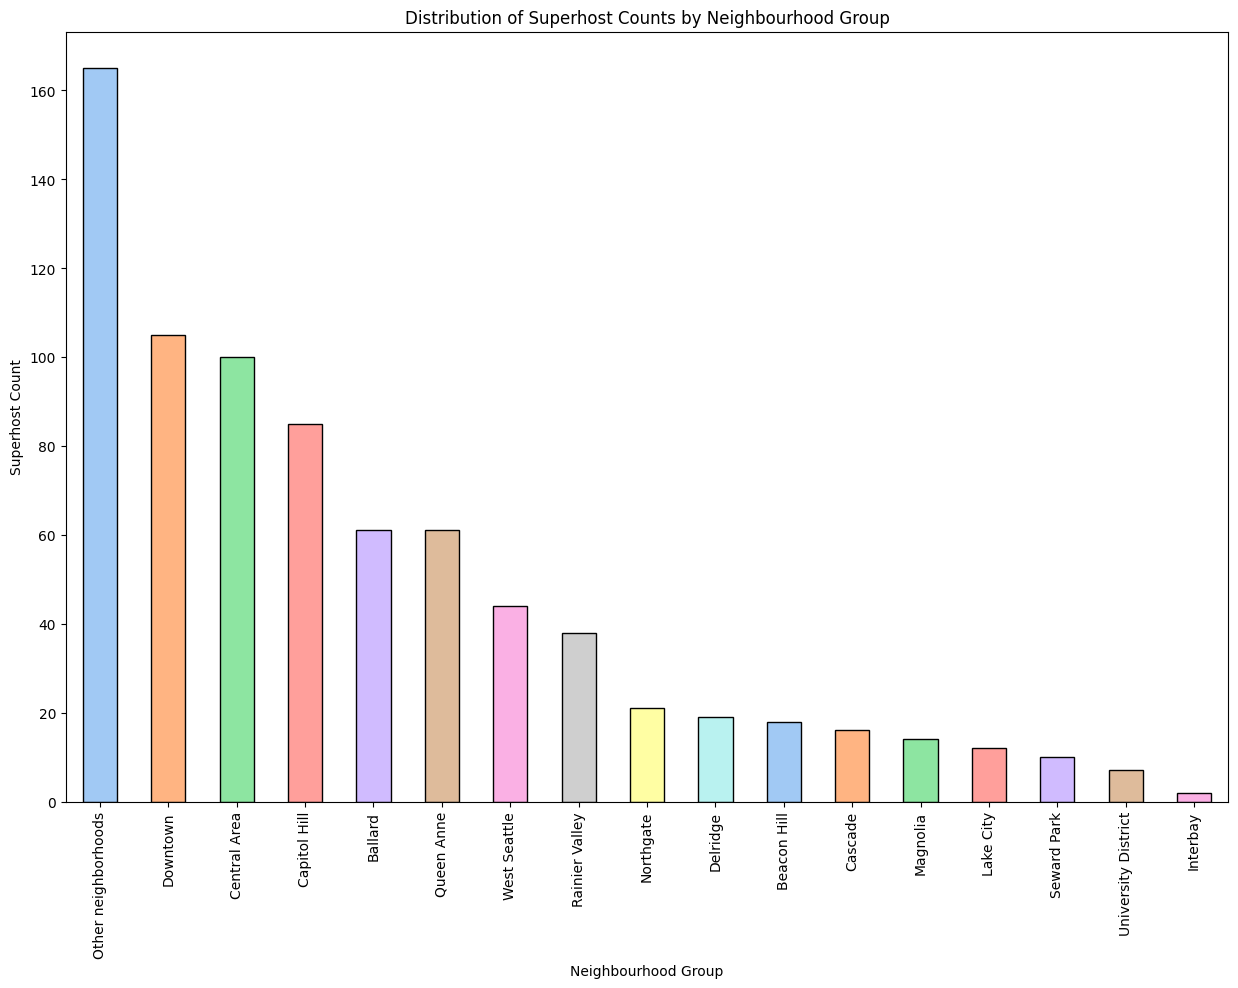

In [ ]:
colors = sns.color_palette("pastel", len(superhost_counts))

# Plot histogram with different colors
plt.figure(figsize=(15, 10))
superhost_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Superhost Count')
plt.title('Distribution of Superhost Counts by Neighbourhood Group')
plt.show()

**Check the distribution of superhost in the "Other neighborhoods" group**

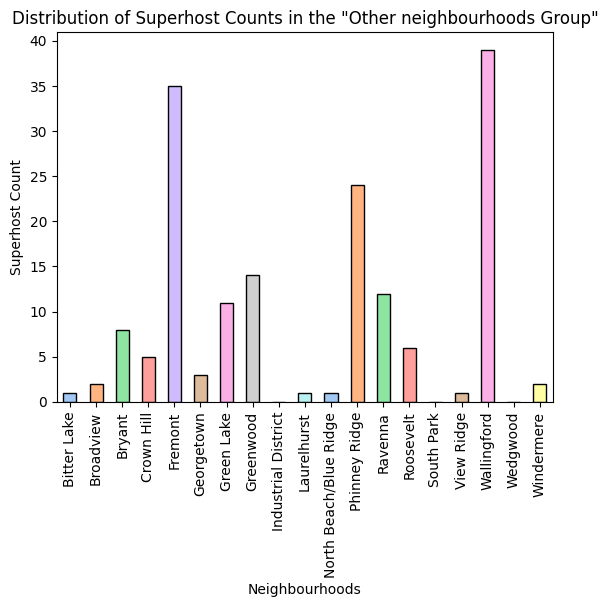

In [ ]:
other_neigh_counts = df[df.neighbourhood_group_cleansed=="Other neighborhoods"].groupby(
    ["neighbourhood_cleansed"]
)['host_is_superhost'].sum()

colors = sns.color_palette("pastel", len(other_neigh_counts))

other_neigh_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Neighbourhoods')
plt.ylabel('Superhost Count')
plt.title('Distribution of Superhost Counts in the "Other neighbourhoods Group"')
plt.show()

**Count number of superhosts by neighbourhood**

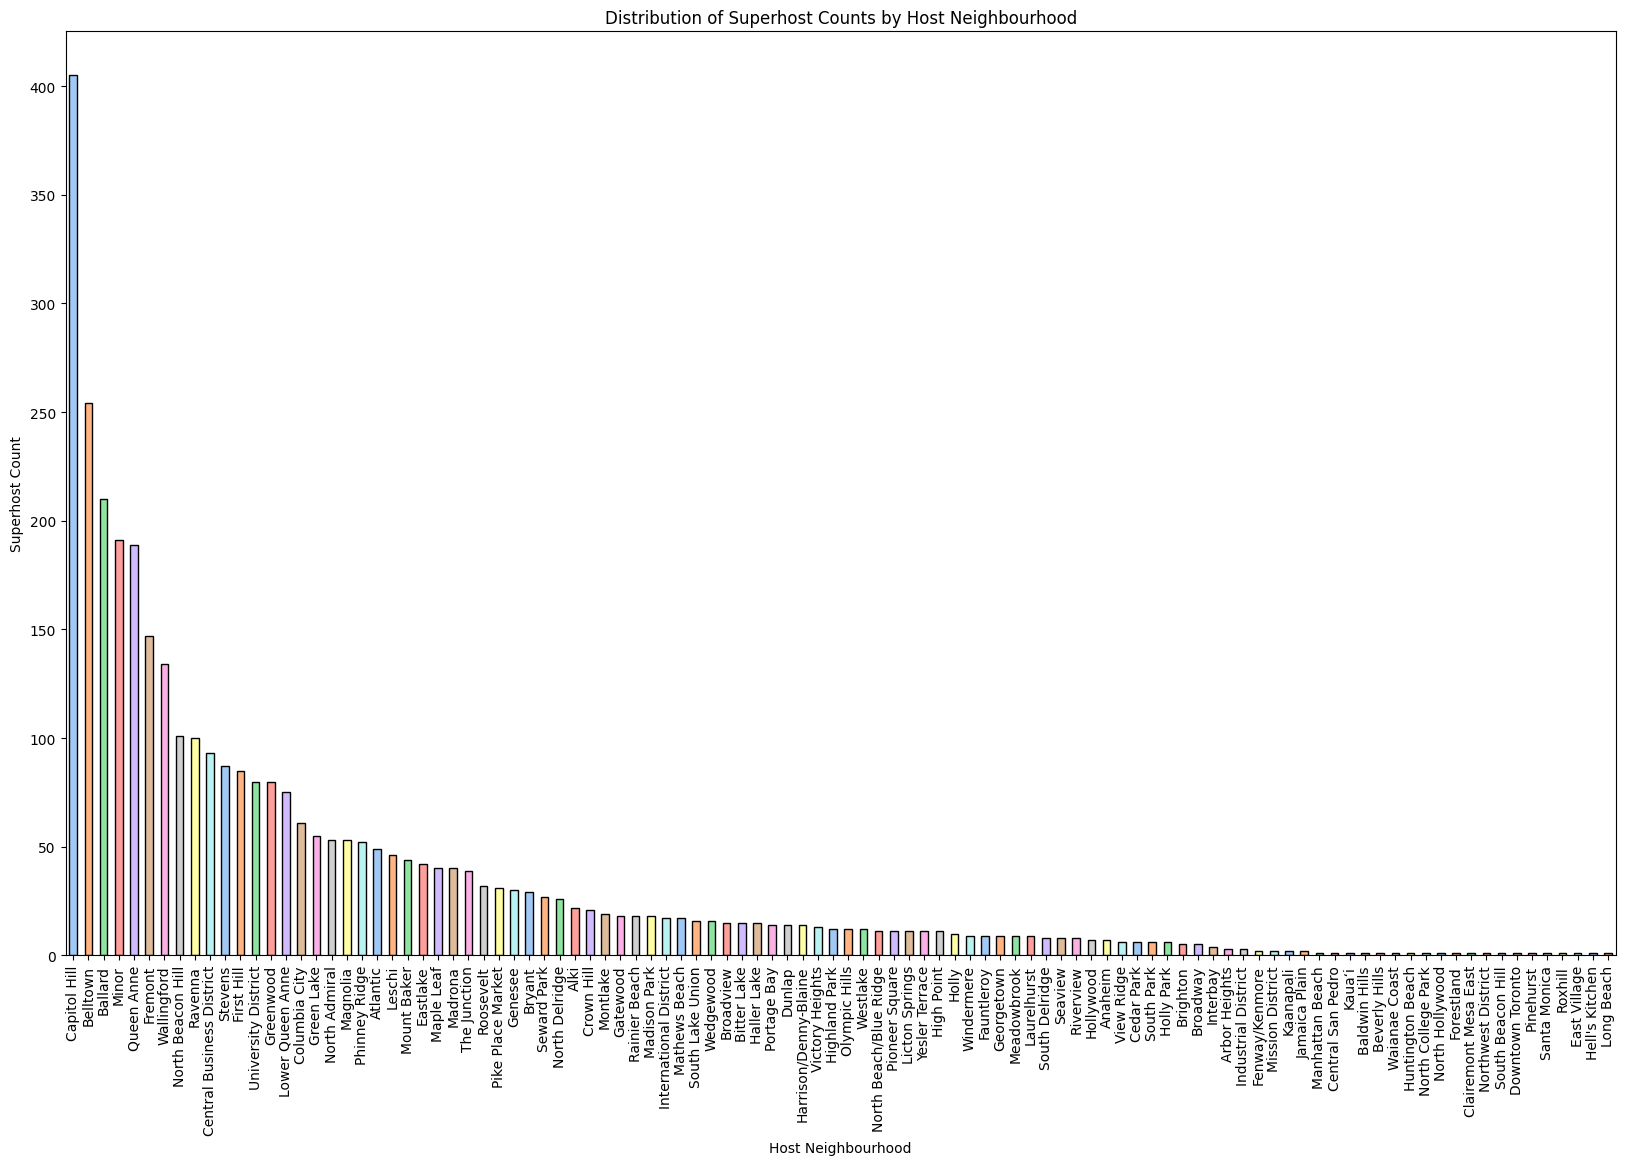

In [ ]:
superhost_counts = df.groupby('host_neighbourhood')['host_is_superhost'].count().sort_values(ascending=False)

# Set a custom color palette for each neighborhood
colors = sns.color_palette("pastel", len(superhost_counts))

# Plot histogram with different colors
plt.figure(figsize=(20, 12))
superhost_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Host Neighbourhood')
plt.ylabel('Superhost Count')
plt.title('Distribution of Superhost Counts by Host Neighbourhood')
plt.show()

**Count number of superhosts by Property Type**

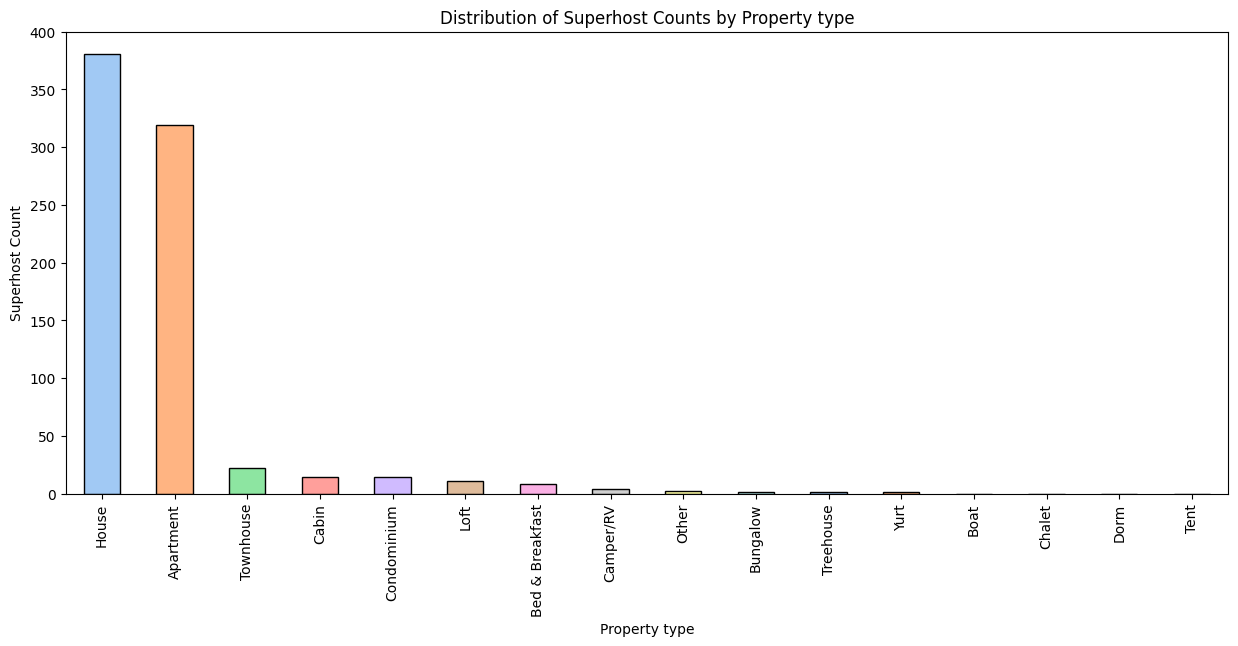

In [ ]:
superhost_counts = df.groupby('property_type')['host_is_superhost'].sum().sort_values(ascending=False)

colors = sns.color_palette("pastel", len(superhost_counts))
plt.figure(figsize=(15, 6))
superhost_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Property type')
plt.ylabel('Superhost Count')
plt.title('Distribution of Superhost Counts by Property type')
plt.show()

**Distribution of hosts by Property Type**

<Figure size 1500x600 with 0 Axes>

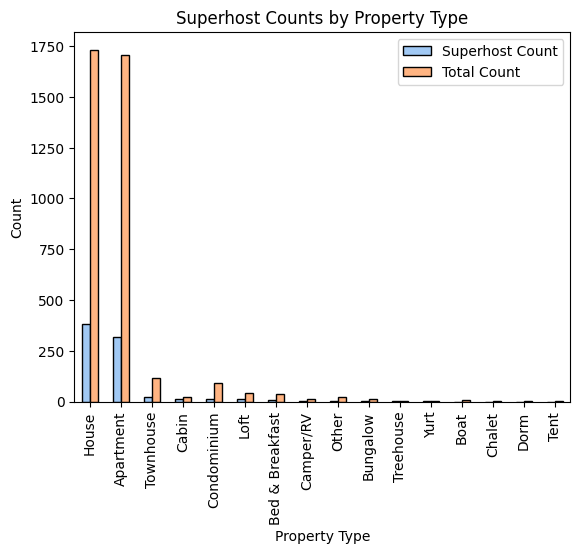

In [ ]:
total_counts = df.groupby('property_type')['host_is_superhost'].count()

result_df = pd.DataFrame({'Superhost Count': superhost_counts, 'Total Count': total_counts})
result_df = result_df.sort_values(by='Superhost Count', ascending=False)

colors = sns.color_palette("pastel", len(result_df))
plt.figure(figsize=(15, 6))
result_df.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Superhost Counts by Property Type')
plt.show()

**Extract data from Property Type**

Since house and apartment are the most with superhost, let's create columns for them and deprecate property_type columns.

In [ ]:
df['property_is_house'] = (df['property_type'] == 'House').astype(int)
df['property_is_apartment'] = (df['property_type'] == 'Apartment').astype(int)

df[['host_is_superhost', 'property_is_house', 'property_is_apartment']].head()

,host_is_superhost,property_is_house,property_is_apartment
0,0,0,1
1,1,0,1
2,0,1,0
3,0,0,1
4,0,1,0


**Drop columns**

Drop columns that have been analysed or extracted.

Drop columns that have no useful information.

In [ ]:
drop_columns = ['property_type', 'neighbourhood_cleansed',
                'neighbourhood', 'room_type', 'bed_type', 'host_response_time',
                'neighbourhood_group_cleansed', 'host_neighbourhood', 'amenities',
                'host_verifications']

df.drop(drop_columns, axis=1, inplace=True, errors='ignore')

object_columns = df.select_dtypes(include=['object'])

**Examine Continous Variables**

In [ ]:
df.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,host_response_time_numeric,property_is_house,property_is_apartment
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,...,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,0.947894,0.999656,0.203772,7.154007,7.154007,0.997643,0.784966,47.628961,-122.333103,3.349398,...,9.541939,9.778826,9.802379,9.602644,9.439086,0.154793,2.946307,2.855946,0.453903,0.447355
std,0.110335,0.016183,0.402854,28.621117,28.621117,0.048501,0.410900,0.043052,0.031745,1.977599,...,0.727446,0.542359,0.518044,0.572913,0.684117,0.361755,5.893029,1.360852,0.497936,0.497286
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.505088,-122.417219,1.000000,...,3.000000,2.000000,2.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.939004,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,47.609418,-122.354320,2.000000,...,9.000000,9.731424,9.758278,9.000000,9.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,47.623601,-122.328874,3.000000,...,10.000000,10.000000,10.000000,10.000000,9.359602,0.000000,1.000000,3.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,3.000000,3.000000,1.000000,1.000000,47.662694,-122.310800,4.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,2.000000,4.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,502.000000,502.000000,1.000000,1.000000,47.733358,-122.240607,16.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,37.000000,4.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_rate              3818 non-null   float64
 1   host_acceptance_rate            3818 non-null   float64
 2   host_is_superhost               3818 non-null   int64  
 3   host_listings_count             3818 non-null   float64
 4   host_total_listings_count       3818 non-null   float64
 5   host_has_profile_pic            3818 non-null   int64  
 6   host_identity_verified          3818 non-null   int64  
 7   latitude                        3818 non-null   float64
 8   longitude                       3818 non-null   float64
 9   accommodates                    3818 non-null   int64  
 10  bathrooms                       3818 non-null   float64
 11  bedrooms                        3818 non-null   float64
 12  beds                            38

# Step 3: Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data


Data Cleaning:
* Deleting redundant columns.
* Dropping duplicates.
* Cleaning individual columns.
* Remove the NaN values from the dataset
* Some Transformations

### Drop unneccessary features



### Data cleaning steps

1. Intuitively select features that are closely related to the superhost criteria

2. Drop columns with more than 50% NaN

3. covert booleans to numerical data

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_listings_count               0
host_total_listings_count         0
host_has_profile_pic              0
host_identity_verified            0
latitude                          0
longitude                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_rate              3818 non-null   float64
 1   host_acceptance_rate            3818 non-null   float64
 2   host_is_superhost               3818 non-null   int64  
 3   host_listings_count             3818 non-null   float64
 4   host_total_listings_count       3818 non-null   float64
 5   host_has_profile_pic            3818 non-null   int64  
 6   host_identity_verified          3818 non-null   int64  
 7   latitude                        3818 non-null   float64
 8   longitude                       3818 non-null   float64
 9   accommodates                    3818 non-null   int64  
 10  bathrooms                       3818 non-null   float64
 11  bedrooms                        3818 non-null   float64
 12  beds                            38

In [ ]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,host_response_time_numeric,property_is_house,property_is_apartment
0,0.960000,1.000000,0,3.0,3.0,1,1,47.636289,-122.371025,4,...,10.000000,10.000000,10.000000,9.000000,10.000000,0,2,3,0,1
1,0.980000,1.000000,1,6.0,6.0,1,1,47.639123,-122.365666,4,...,10.000000,10.000000,10.000000,10.000000,10.000000,0,6,4,0,1
2,0.670000,1.000000,0,2.0,2.0,1,1,47.629724,-122.369483,11,...,10.000000,10.000000,10.000000,10.000000,10.000000,0,2,3,1,0
3,0.939004,0.999568,0,1.0,1.0,1,1,47.638473,-122.369279,3,...,9.454018,9.731424,9.758278,9.564677,9.359602,0,1,0,0,1
4,1.000000,0.999568,0,2.0,2.0,1,1,47.632918,-122.372471,6,...,9.000000,10.000000,10.000000,9.000000,9.000000,0,1,4,1,0


# 3. Analysis (model building and training)

We will try two classification models, namely:

1. A Logistic Regression Model
2. A RandomForest Classification Model

**Logistic Regression Model**

In [ ]:
# Select features and target
X = df[['number_of_reviews', 'review_scores_rating', 'availability_365', 'host_response_rate']]
y = df[dependent_feat]  # assuming 'is_superhost' is your binary target variable

X['review_scores_rating'].fillna(0, inplace=True)
X['host_response_rate'].fillna(0, inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# calculate confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("R2 score: ", r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

print("MSE score: ", mse)

<ipython-input-68-d931704a8a7e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['review_scores_rating'].fillna(0, inplace=True)
<ipython-input-68-d931704a8a7e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['host_response_rate'].fillna(0, inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7840314136125655
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       584
           1       0.71      0.14      0.23       180

    accuracy                           0.78       764
   macro avg       0.75      0.56      0.55       764
weighted avg       0.77      0.78      0.72       764

R2 score:  -0.1992009132420094
MSE score:  0.21596858638743455


**RandomForest Classifiers Model (1st iteration)**




In [ ]:
X = df.copy().drop(dependent_feat, axis=1)
y = df[dependent_feat]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("R2 score: ", r2_score(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
print("MSE score: ", mse)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       584
           1       0.85      0.61      0.71       180

    accuracy                           0.88       764
   macro avg       0.87      0.79      0.82       764
weighted avg       0.88      0.88      0.87       764

R2 score:  0.34589041095890405
MSE score:  0.11780104712041885
F1 score:  0.7077922077922076


<ipython-input-67-beaeb33d73f9>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


**Select top 10 features**

Select top 10 features based on the model's `feature_importances_` attributes.

Top 10 important features:  Index(['number_of_reviews', 'review_scores_rating', 'price', 'latitude',
       'longitude', 'review_scores_value', 'availability_365',
       'availability_90', 'host_response_rate', 'availability_60',
       'availability_30', 'review_scores_cleanliness', 'host_listings_count',
       'extra_people', 'host_total_listings_count'],
      dtype='object')


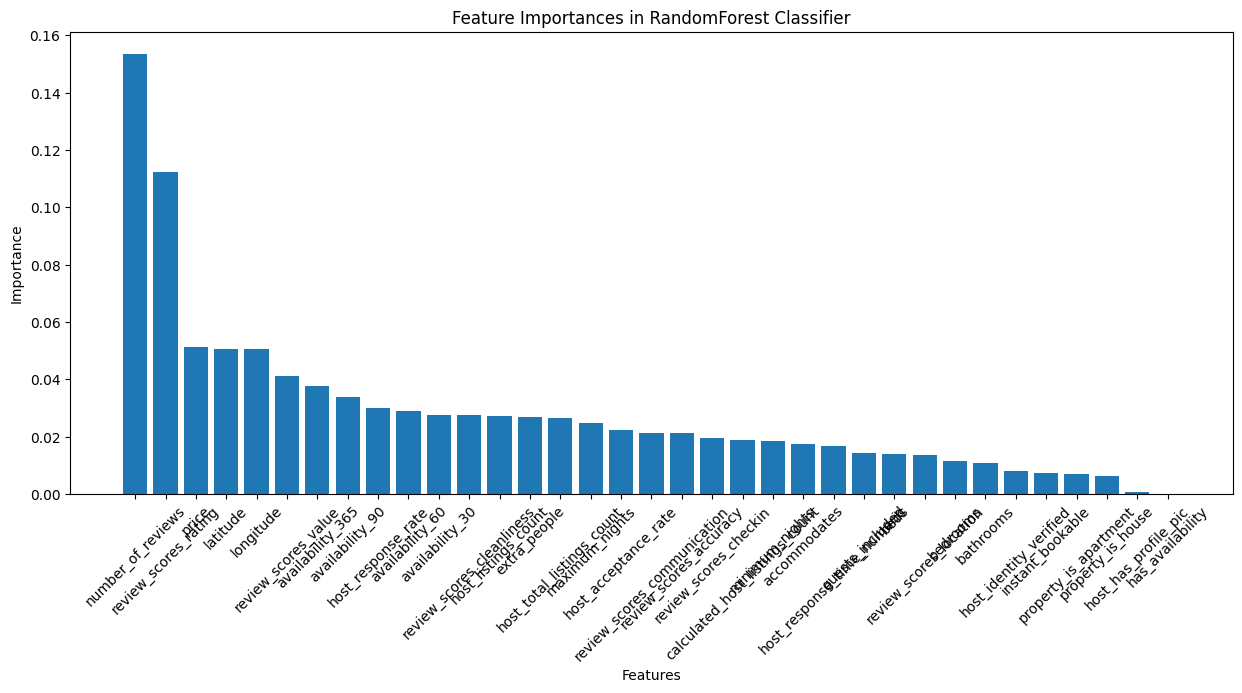

In [ ]:
# feature importance
feature_importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select top N features
N = 10
top_n_features = X_train.columns[sorted_indices][:N]

threshold = 0.025
selected_features = X_train.columns[sorted_indices][feature_importances[sorted_indices] > threshold]
print("Top 10 important features: ", selected_features)

# Plot the feature importances
plt.figure(figsize=(15, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=45)
plt.title('Feature Importances in RandomForest Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**RandomTree Classifier Model (2nd iteration)**

Observe the selected (top 10) features from the 1st iteration, drop features that are less likely to contribute to the dependent feature such as `latitude`, `longitude`, or features already captured by other features such as `availability_90`

In [ ]:
# Train the RandomForest classifier with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
# drop columns
X_train_selected.drop(['longitude', 'latitude', 'availability_90'], axis=1, inplace=True)
X_test_selected.drop(['longitude', 'latitude', 'availability_90'], axis=1, inplace=True)

rf_classifier_selected_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_selected_features.fit(X_train_selected, y_train)

y_pred = rf_classifier_selected_features.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("R2 score: ", r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print("MSE score: ", mse)

<ipython-input-63-0b1bd921ba3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected.drop(['longitude', 'latitude', 'availability_90'], axis=1, inplace=True)
<ipython-input-63-0b1bd921ba3b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_selected.drop(['longitude', 'latitude', 'availability_90'], axis=1, inplace=True)
<ipython-input-63-0b1bd921ba3b>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_selected_features.fit(X_train_selected, y_train)


Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       584
           1       0.84      0.60      0.70       180

    accuracy                           0.88       764
   macro avg       0.86      0.78      0.81       764
weighted avg       0.87      0.88      0.87       764

R2 score:  0.3240867579908675
MSE score:  0.12172774869109948


In [ ]:
feature_importances = rf_classifier_selected_features.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
top_n_features = X_train_selected.columns[sorted_indices][:N]
print(top_n_features)

Index(['number_of_reviews', 'review_scores_rating', 'price',
       'availability_365', 'host_listings_count', 'extra_people',
       'review_scores_value', 'host_response_rate', 'accommodates',
       'review_scores_accuracy'],
      dtype='object')


**RandomTree Classifier Model (3rd iteration)**

Reduce the number of estimators and observe the metrics

In [ ]:
n_estimators = 50
rf_classifier_selected_features_2 = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
rf_classifier_selected_features_2.fit(X_train_selected, y_train)

y_pred = rf_classifier_selected_features_2.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("R2 score: ", r2_score(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
print("MSE score: ", mse)

<ipython-input-64-a3d334381d9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_selected_features_2.fit(X_train_selected, y_train)


Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       584
           1       0.84      0.60      0.70       180

    accuracy                           0.88       764
   macro avg       0.87      0.78      0.81       764
weighted avg       0.88      0.88      0.87       764

R2 score:  0.3313546423135463
MSE score:  0.12041884816753927


# RESULTS & DISCUSSION

### Metrics

1. **Accuracy:** measures the proportion of correctly classified instances out of the total number of instances in the dataset.

2. **R2 Score:** R2 score, or coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
  - R2 score ranges from 0 to 1.
  - R2 = 0: The model does not explain any variability in the dependent variable.
  - R2 = 1: The model perfectly explains the variability in the dependent variable.
  - Negative R2 scores indicate that the model performs worse than a simple mean, which suggests that the model does not explain the variability in the data and provides no predictive power.

3. **MSE Score:** The MSE (Mean Squared Error) measures the average squared difference between the actual and predicted values. It penalizes larger errors more than smaller ones. A lower MSE value indicates better model performance. It is sensitive to outliers, as larger errors are squared

6. **F1 Score:** A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

### Models

1. **Logistic Regression Model:**
  - Accuracy: 0.7840314136125655
  - R2 score: -0.1992009132420094
  - MSE score: 0.21596858638743455
  - F1 score: 0.23

  
  The Logistic regression (LogReg) model showed a good prdiction accuracy and MSE score. However it showed a negative R2 score which suggest that the model is wrong the wrong choice for this problem. The F1 score at `0.23` suggests that the model is biased and not suitable for the predication.

2. **RandomTree Classifier Model (1st iteration):**
  - Accuracy: 0.87
  - R2 score:  0.26594368340943675
  - MSE score:  0.13219895287958114
  - F1 score: 0.70

  Following the Logistic regression model negative r2 score, we proceeded to explore with a RandomForest Classifier (RFC) model. The model showed higher accuracy and lower MSE score. Indicating that the model is quite good for this classification problem. The R2 of 0.26 although way better than the Logistic Regression model is still on the lower side, indicating the model does little to explain any variability in the dependent variable. The F1 score at `0.70` suggests that the model is performing well in terms of making accurate positive predictions (precision) and capturing most of the positive instances (recall).

3. **RandomTree Classifier Model (2nd iteration):**
  - Accuracy: 0.88
  - R2 score: 0.3168188736681886
  - MSE score: 0.12303664921465969
  - F1 score: 0.70

  In the 2nd iteration of the RFC model we used the top ten features from the 1st iteration while dropping features that have little correlation with the the dependent feature (host_is_superhost) such as `longitude`, `latitude`. The model showed a slight improvement in all metrics with the R2 score seeing the largest increase from 0.26 to 0.31. The F1 score decrease slightly from `0.71` to `0.70`, suggesting that the model is performing well in terms of making accurate positive predictions (precision) and capturing most of the positive instances (recall).


4. **RandomTree Classifier Model (3rd iteration):**
  - Accuracy: 0.86
  - R2 score: 0.29501522070015207
  - MSE score: 0.12696335078534032
  - F1 score: 0.70

  In the 3rd iteration we focused on hyperparament tuning. We reduced the number of estimators from 100 to 50 and saw a reduction in accuracy and r2 score and a very slight increase in the MSE score. Suggesting that 100 is a better value for the number of estimators. Overall, this show that a higher number of estimators provides a better result. The F1 score remaind the same suggesting that the model is performing well.
  

# CONCLUSION

We trained the data in several models with hyperparameter tuning to see best parameters for each model. The LogisticRegression model performed poorly while the RandomForest Models performed much better especially in the second iteration.


### WHAT CAN BE DONE TO INCREASE ACCURACY

There could be more data. The dataset is about 3500 records showing about 775 superhost records. A larger dataset will provide more data to train the model therefore increasing the accuracy.
